<a href="https://colab.research.google.com/github/iangreene/ECE50024_FinalProject/blob/main/ECE50024_FinalProject_Method_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<ipython-input-454-239bd4687e20>:27: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


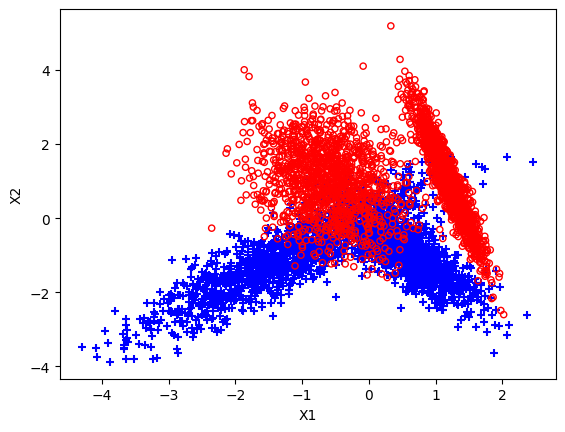

In [ ]:
# Random dataset similar to banana
COLOR = {-1: 'b', 1: 'r'}
MARKER = {-1: '+', 1: 'o'}
FACE = {-1: 'b', 1: 'none'}
SIZE = {-1: 40, 1: 20}

N = 5000

data, labels = make_classification(n_samples=N, n_features=3, n_redundant=1, n_informative=2,n_clusters_per_class=2,flip_y = 0.0,weights= (0.5,0.5))

X_labeled = []
y_labeled = []
for d in zip(labels, data[:, 0], data[:, 1]):
  if d[0] == 0:
      X_labeled.append([d[1],d[2]])
      y_labeled.append(-1)
  else:
      X_labeled.append([d[1],d[2]])
      y_labeled.append(1)

X_labeled = np.array(X_labeled)
y_labeled = np.array(y_labeled)


for label in [-1, 1]:
    mask = (y_labeled == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


<ipython-input-498-3876c41881e2>:9: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


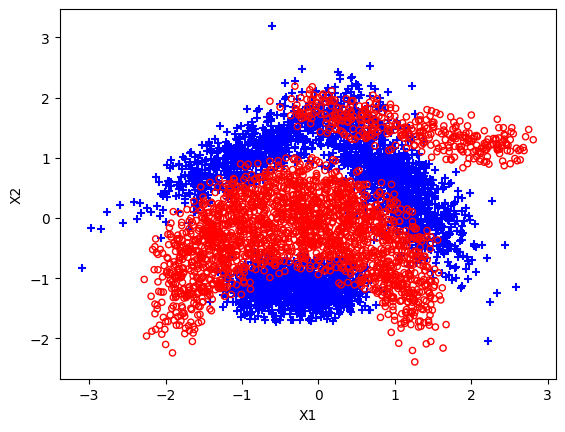

In [ ]:
# 'Banana' Dataset
df = pd.read_csv("banana.csv")

X_labeled = df.iloc[:, :-1].to_numpy()
y_labeled = df.iloc[:, -1].to_numpy()

for label in [-1, 1]:
    mask = (y_labeled == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
print(X_labeled)
print(np.shape(X_labeled))
print(y_labeled)
print(np.shape(y_labeled))

[[ 1.14  -0.114]
 [-1.52  -1.15 ]
 [-1.05   0.72 ]
 ...
 [ 2.64   1.14 ]
 [ 0.769  0.772]
 [-0.255 -0.142]]
(5300, 2)
[-1  1 -1 ...  1 -1  1]
(5300,)


<ipython-input-500-f6e26054489e>:16: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


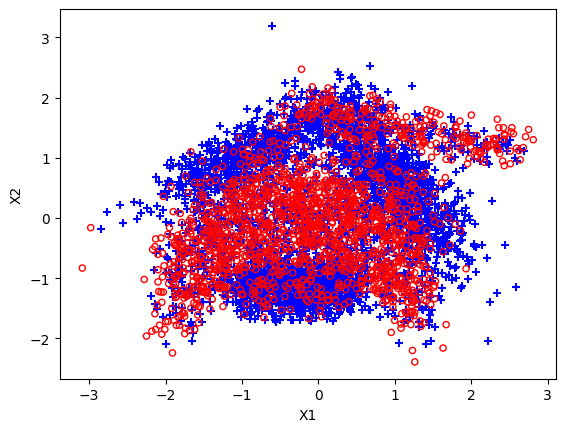

In [ ]:
# Add noise to dataset
noise_rho_1 = 0.4
noise_rho_2 = 0.1

y_noisy = np.copy(y_labeled)
for i in range(len(y_noisy)):
    if y_labeled[i] == 1:
        if np.random.random() < noise_rho_1:
            y_noisy[i] = -1
    elif y_labeled[i] == -1:
        if np.random.random() < noise_rho_2:
            y_noisy[i] = 1

for label in [-1, 1]:
    mask = (y_noisy == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# Baseline
svm = SVC()
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)

<ipython-input-502-c0136481e755>:3: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


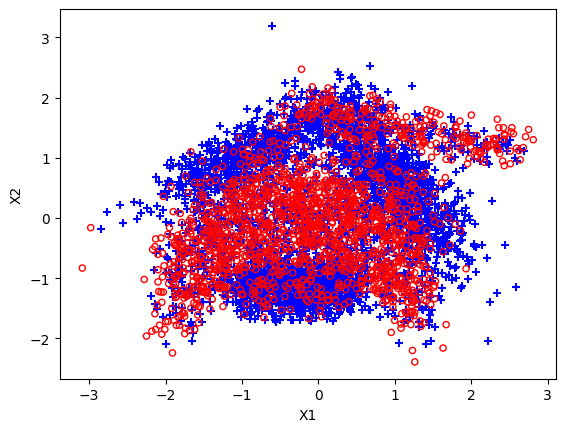

<ipython-input-502-c0136481e755>:10: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


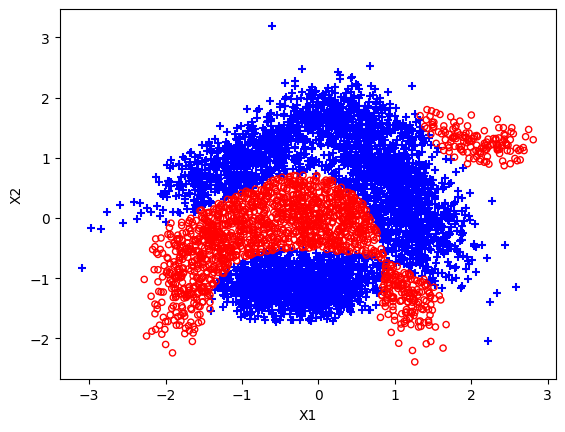

In [ ]:
for label in [-1, 1]:
    mask = (y_noisy == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

for label in [-1, 1]:
    mask = (y_pred == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
acc_train = accuracy_score(y_labeled, y_pred)
print('Training accuracy:', acc_train)

Training accuracy: 0.8490566037735849


In [ ]:
# Implementation of Method of Label-Dependent Costs with Known Noise Rates
rho_plus_1 = noise_rho_1  
rho_minus_1 = noise_rho_2 
alpha_star = (1 - rho_plus_1 + rho_minus_1) / 2
print(alpha_star)

svm = SVC(class_weight={1: 1/(alpha_star), -1: 1/(1-alpha_star)})
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)
print(accuracy_score(y_labeled, y_pred))

0.35
0.8986792452830189


<ipython-input-505-c0136481e755>:3: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


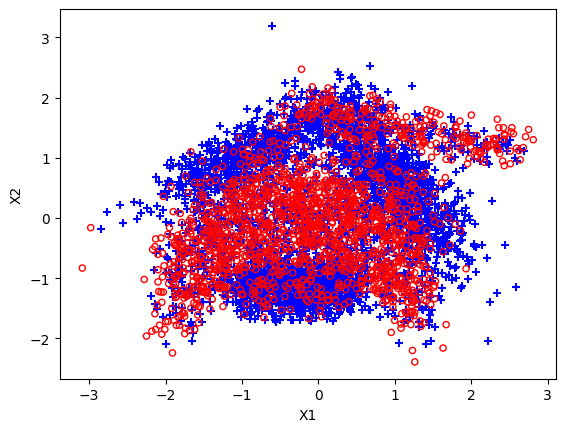

<ipython-input-505-c0136481e755>:10: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


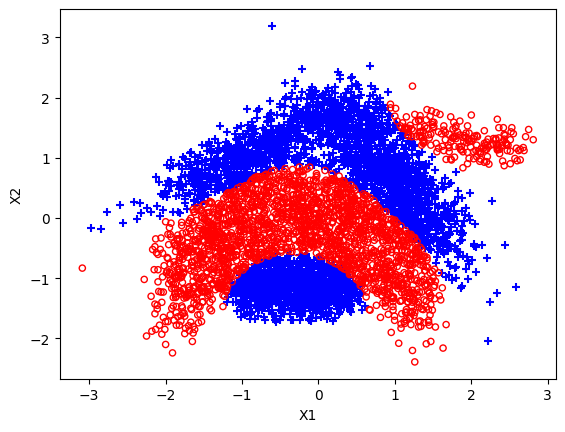

In [ ]:
for label in [-1, 1]:
    mask = (y_noisy == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

for label in [-1, 1]:
    mask = (y_pred == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# Implementation of Method of Label-Dependent Costs with Unknown Noise Rates
k = 5

alpha_star_values = np.linspace(0.1, 0.9, 17)

kf = KFold(n_splits=k)

best_alpha_star = None
best_loss = np.inf

def alpha_weighted_loss(t, y, alpha):
    return (1-alpha) * (y == 1) * (t <= 0) + (alpha) * (y == -1) * (t > 0)


for alpha_star in alpha_star_values:
    losses = []

    for train_index, val_index in kf.split(X_labeled):
        X_train, X_val = X_labeled[train_index], X_labeled[val_index]
        y_train, y_val = y_noisy[train_index], y_noisy[val_index]

        svm = SVC(class_weight={1: 1/(alpha_star), -1: 1/(1-alpha_star)})
        svm.fit(X_train, y_train)

        y_pred = svm.decision_function(X_train)
        loss = np.mean(alpha_weighted_loss(y_pred, y_train, (1-alpha_star)))
        losses.append(loss)

    avg_loss = np.mean(losses)

    if avg_loss < best_loss:
        best_alpha_star = alpha_star
        best_loss = avg_loss

svm = SVC(class_weight={1: 1/(best_alpha_star), -1: 1/(1-best_alpha_star)})
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)
print("Optimal alpha_star:", best_alpha_star)
print("Best cross-validated loss:", best_loss)
print("Accuracy on the entire labeled dataset:", accuracy_score(y_labeled, y_pred))


Optimal alpha_star: 0.45000000000000007
Best cross-validated loss: 0.12909669811320756
Accuracy on the entire labeled dataset: 0.8881132075471698


<ipython-input-507-c0136481e755>:3: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


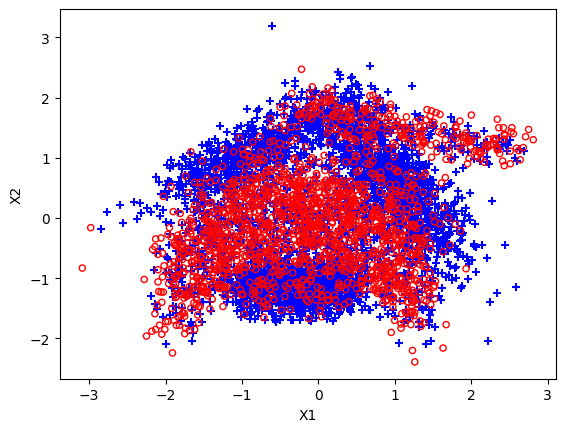

<ipython-input-507-c0136481e755>:10: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])


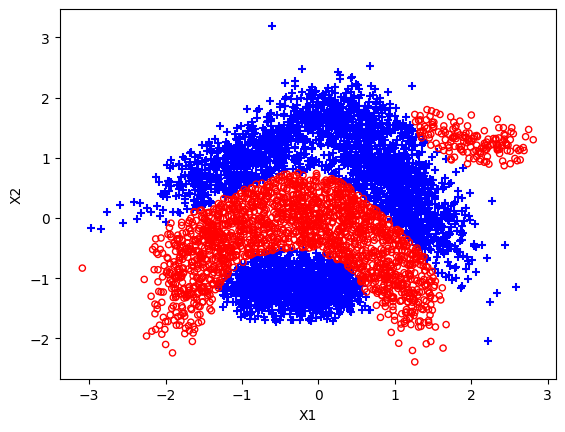

In [ ]:
for label in [-1, 1]:
    mask = (y_noisy == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

for label in [-1, 1]:
    mask = (y_pred == label)
    plt.scatter(X_labeled[mask, 0], X_labeled[mask, 1], s=SIZE[label], facecolors=FACE[label], edgecolors=COLOR[label], marker=MARKER[label])
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [ ]:
# Dataset Creation for UCI Banknote
df = pd.read_csv("data_banknote_authentication.txt", names=["variance", "skewness", "curtosis", "entropy", "class"])

df["class"] = df["class"].replace(0, -1)

X_labeled = df.iloc[:, :-1].to_numpy()
y_labeled = df.iloc[:, -1].to_numpy()

In [ ]:
# Adding Noise to UCI Banknote Dataset
rho_plus = 0.5
rho_minus = 0.1

y_noisy = np.copy(y_labeled)
for i in range(len(y_noisy)):
    if y_labeled[i] == 1:
        if np.random.random() < rho_plus:
            y_noisy[i] = -1
    elif y_labeled[i] == -1:
        if np.random.random() < rho_minus:
            y_noisy[i] = 1

In [ ]:
# Baseline
svm = SVC()
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)

acc_train = accuracy_score(y_labeled, y_pred)
print('Training accuracy:', acc_train)

Training accuracy: 0.8177842565597667


In [ ]:
# Implementation of Method of Label-Dependent Costs with Known Noise Rates
rho_plus_1 = rho_plus
rho_minus_1 = rho_minus
alpha_star = (1 - rho_plus_1 + rho_minus_1) / 2
print(alpha_star)

svm = SVC(class_weight={1: 1/(alpha_star), -1: 1/(1-alpha_star)})
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)
print(accuracy_score(y_labeled, y_pred))

0.3
0.9927113702623906


In [ ]:
# Implementation of Method of Label-Dependent Costs with Unknown Noise Rates
k = 5

alpha_star_values = np.linspace(0.1, 0.9, 17)

kf = KFold(n_splits=k)

best_alpha_star = None
best_loss = np.inf

def alpha_weighted_loss(t, y, alpha):
    return (1-alpha) * (y == 1) * (t <= 0) + (alpha) * (y == -1) * (t > 0)


for alpha_star in alpha_star_values:
    losses = []

    for train_index, val_index in kf.split(X_labeled):
        X_train, X_val = X_labeled[train_index], X_labeled[val_index]
        y_train, y_val = y_noisy[train_index], y_noisy[val_index]

        svm = SVC(class_weight={1: 1/(alpha_star), -1: 1/(1-alpha_star)})
        svm.fit(X_train, y_train)

        y_pred = svm.decision_function(X_train)
        loss = np.mean(alpha_weighted_loss(y_pred, y_train, (1-alpha_star)**3))
        losses.append(loss)

    avg_loss = np.mean(losses)

    if avg_loss < best_loss:
        best_alpha_star = alpha_star
        best_loss = avg_loss

# Train the model with the optimal alpha_star on the entire labeled dataset
svm = SVC(class_weight={1: 1/(best_alpha_star), -1: 1/(1-best_alpha_star)})
svm.fit(X_labeled, y_noisy)

# Predict and evaluate the model
y_pred = svm.predict(X_labeled)
print("Optimal alpha_star:", best_alpha_star)
print("Best cross-validated loss:", best_loss)
print("Accuracy on the entire labeled dataset:", accuracy_score(y_labeled, y_pred))

Optimal alpha_star: 0.4
Best cross-validated loss: 0.08673750732665506
Accuracy on the entire labeled dataset: 0.999271137026239


In [ ]:
# Dataset Creation for UCI Breast
df = pd.read_csv("dataR2.csv")
df["Classification"] = df["Classification"].replace(2, -1)

X_labeled = df.iloc[:, :-1].to_numpy()
y_labeled = df.iloc[:, -1].to_numpy()

In [ ]:
print(X_labeled)
scaler = MinMaxScaler()
X_labeled = scaler.fit_transform(X_labeled)
print(X_labeled)

[[ 48.          23.5         70.         ...   9.7024       7.99585
  417.114     ]
 [ 83.          20.69049454  92.         ...   5.429285     4.06405
  468.786     ]
 [ 82.          23.12467037  91.         ...  22.43204      9.27715
  554.697     ]
 ...
 [ 65.          32.05        97.         ...  22.54        10.33
  314.05      ]
 [ 72.          25.59        82.         ...  33.75         3.27
  392.46      ]
 [ 86.          27.18       138.         ...  14.11         4.35
   90.09      ]]
[[3.69230769e-01 2.53850329e-01 7.09219858e-02 ... 2.21151727e-01
  6.06648498e-02 2.24659127e-01]
 [9.07692308e-01 1.14826180e-01 2.26950355e-01 ... 1.03706769e-01
  1.08258334e-02 2.55926278e-01]
 [8.92307692e-01 2.35277707e-01 2.19858156e-01 ... 5.71021092e-01
  7.69064520e-02 3.07911729e-01]
 ...
 [6.30769231e-01 6.76934210e-01 2.62411348e-01 ... 5.73988332e-01
  9.02522500e-02 1.62294256e-01]
 [7.38461538e-01 3.57270833e-01 1.56028369e-01 ... 8.82090964e-01
  7.60552668e-04 2.09740790e-01]

In [ ]:
# Adding Noise to UCI Breast Dataset
rho_plus = 0.1
rho_minus = 0.4

y_noisy = np.copy(y_labeled)
for i in range(len(y_noisy)):
    if y_labeled[i] == 1:
        if np.random.random() < rho_plus:
            y_noisy[i] = -1
    elif y_labeled[i] == -1:
        if np.random.random() < rho_minus:
            y_noisy[i] = 1

In [ ]:
# Baseline
svm = SVC()
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)

acc_train = accuracy_score(y_labeled, y_pred)
print('Training accuracy:', acc_train)

Training accuracy: 0.5689655172413793


In [ ]:
# Implementation of Method of Label-Dependent Costs with Known Noise Rates
rho_plus_1 = rho_plus
rho_minus_1 = rho_minus
alpha_star = (1 - rho_plus_1 + rho_minus_1) / 2
print(alpha_star)

svm = SVC(class_weight={1: 1/(alpha_star), -1: 1/(1-alpha_star)})
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)
print(accuracy_score(y_labeled, y_pred))

0.65
0.7931034482758621


In [ ]:
# Implementation of Method of Label-Dependent Costs with Unknown Noise Rates
k = 5

alpha_star_values = np.linspace(0.1, 0.9, 17)

kf = KFold(n_splits=k)

best_alpha_star = None
best_loss = np.inf

def alpha_weighted_loss(t, y, alpha):
    return (1-alpha) * (y == 1) * (t <= 0) + (alpha) * (y == -1) * (t > 0)


for alpha_star in alpha_star_values:
    losses = []

    for train_index, val_index in kf.split(X_labeled):
        X_train, X_val = X_labeled[train_index], X_labeled[val_index]
        y_train, y_val = y_noisy[train_index], y_noisy[val_index]

        svm = SVC(class_weight={1: 1/(alpha_star), -1: 1/(1-alpha_star)})
        svm.fit(X_train, y_train)

        y_pred = svm.decision_function(X_train)
        loss = np.mean(alpha_weighted_loss(y_pred, y_train, (1+alpha_star)**2*(1-alpha_star)))
        losses.append(loss)

    avg_loss = np.mean(losses)

    if avg_loss < best_loss:
        best_alpha_star = alpha_star
        best_loss = avg_loss

svm = SVC(class_weight={1: 1/(best_alpha_star), -1: 1/(1-best_alpha_star)})
svm.fit(X_labeled, y_noisy)

y_pred = svm.predict(X_labeled)
print("Optimal alpha_star:", best_alpha_star)
print("Best cross-validated loss:", best_loss)
print("Accuracy on the entire labeled dataset:", accuracy_score(y_labeled, y_pred))

Optimal alpha_star: 0.65
Best cross-validated loss: 0.040354201729780305
Accuracy on the entire labeled dataset: 0.7931034482758621
